In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'amazon_sales.csv' with the actual file path)
df = pd.read_csv('amazon.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [2]:
# Clean and preprocess the data

# Convert prices and discount percentage to numeric values
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Convert rating and rating_count to numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

# Extract the main category (first value before '|')
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else x)

# Check cleaned dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

(None,
    product_id                                       product_name  \
 0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
 1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
 2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
 3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
 4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
 
                                             category  discounted_price  \
 0  Computers&Accessories|Accessories&Peripherals|...             399.0   
 1  Computers&Accessories|Accessories&Peripherals|...             199.0   
 2  Computers&Accessories|Accessories&Peripherals|...             199.0   
 3  Computers&Accessories|Accessories&Peripherals|...             329.0   
 4  Computers&Accessories|Accessories&Peripherals|...             154.0   
 
    actual_price  discount_percentage  rating  rating_count  \
 0        1099.0                 64.0     4.2       24269.0   

In [3]:
#1 What is the average rating for each product category
avg_rating_per_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
avg_rating_per_category

,rating
main_category,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749
Home&Kitchen,4.040716
Health&PersonalCare,4.000000
MusicalInstruments,3.900000
Car&Motorbike,3.800000


In [4]:
#2 What are the top rating_count products by category
top_rated_products = df.loc[df.groupby('main_category')['rating_count'].idxmax(),
                            ['main_category', 'product_name', 'rating', 'rating_count']]

# Display the result
top_rated_products


,main_category,product_name,rating,rating_count
1157,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,3.8,1118.0
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,4.3,253105.0
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426973.0
1247,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,4.0,3663.0
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,4.1,270563.0
982,HomeImprovement,"Gizga Essentials Cable Organiser, Cord Managem...",4.5,5985.0
613,MusicalInstruments,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,4.0,68664.0
659,OfficeProducts,Casio FX-82MS 2nd Gen Non-Programmable Scienti...,4.4,12179.0
924,Toys&Games,Faber-Castell Connector Pen Set - Pack of 25 (...,4.3,15867.0


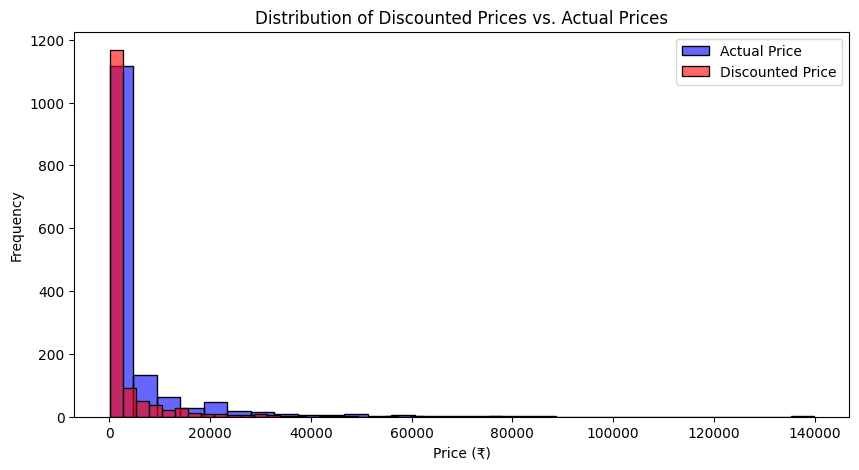

In [5]:
#3. What is the distribution of discounted prices vs. actual prices
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of discounted vs actual prices
plt.figure(figsize=(10, 5))
sns.histplot(df['actual_price'], bins=30, color='blue', label='Actual Price', alpha=0.6)
sns.histplot(df['discounted_price'], bins=30, color='red', label='Discounted Price', alpha=0.6)

plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.legend()
plt.show()


In [6]:
#4 How does the average discount percentage vary across categories
avg_discount_per_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)

# Display the result
avg_discount_per_category


,discount_percentage
main_category,
HomeImprovement,57.500000
Computers&Accessories,54.024283
Health&PersonalCare,53.000000
Electronics,50.828897
MusicalInstruments,46.000000
Car&Motorbike,42.000000
Home&Kitchen,40.120536
OfficeProducts,12.354839
Toys&Games,0.000000


In [7]:
#5 What are the most popular product names
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

# Display the result
popular_products


,rating_count
product_name,
"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot",853945.0
"Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black",426973.0
"Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black",426973.0
"JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)",385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red),363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink),363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black),363711.0
"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery",313836.0
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) | Octa-core Helio G35 | 5000 mAh Battery",313836.0


In [8]:
#6 What are the most popular product keywords
from collections import Counter
import re

# Tokenize and count words in product names
words = ' '.join(df['product_name'].dropna()).lower()
words = re.findall(r'\b[a-zA-Z0-9]+\b', words)  # Extract words
word_counts = Counter(words)

# Get the top 10 most common words
popular_keywords = word_counts.most_common(10)
popular_keywords


[('with', 752),
 ('for', 674),
 ('black', 530),
 ('usb', 417),
 ('cable', 414),
 ('1', 413),
 ('and', 331),
 ('c', 289),
 ('3', 275),
 ('2', 267)]

In [9]:
#7 What are the most popular product reviews
popular_reviews = df.groupby('review_content')['rating_count'].sum().sort_values(ascending=False).head(10)

# Display the result
popular_reviews


,rating_count
review_content,
"I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,All good,It's the best HDMI cable at this price range. No problems yet. Just go for it !!,I was expecting this to be delivered on time and it was delivered on time.Product is good as i have tried other cables and wires from Amazon basica brand.,Good one",1707891.0
"If you want a smart phone for just the use of calling and using social media. This is a very good option for you. I bought it for my mother who specifically told she just want a phone for calling purpose. This has only 2 gb of ram so don't think of running games like bgmi or asphalt and it also won't run very smooth under above normal conditions. There is no fingerprint sensor and the camera is trash. But the battery is 4000mah and has considerably high battery life. There is no fast charging only normal charger is given. So in my opinion this is a phone for a below average user who uses the smart phone just for calling or for scrolling through social media.,This is worth for price , has the latest technical softwares and perform well for minimal usage , ofcourse it has configuration less so we should not look better than thisBattery life more than expected, we could buy for this budget range,Simple and good, ok camera,Ok,Overall good quality product,Good unit,Good,Good mobile for basic users",1255336.0
"The sound quality of this earphone are really good. The bass part was also good. I only found the noise cancellation was not what I expected. It could be much better. Finally, I can say its a good value for money.,At this purchase, i did'nt received head phone pouch to keep my head phones safe... it disappointed me,overall good and decent quality, I am writing this after two months, I dont use regularly but whenever I use my colleagues says that your voice is clear 😂,Pin that I do connect to the phone gets automatically to outside. It doesn't work. Plz amazon help me. I'm a regular customer of this company. I'll be really thankful to you.,Great sound quality and good bass. Decent noise cancellation. I couldn't have asked for better earphones at this price.,Best for gaming,Good,Nice product",1091137.0
"Good product,long wire,Charges good,Nice,I bought this cable for Rs.339 worthy product for this price, i tested it in various charger adapters 33w and 18w it supports fast charging as well.,Good,Ok,I had got this at good price on sale on Amazon and product is useful with warranty but for warranty you need to go very far not practical for such a cost and mine micro to type c connector stopped working after few days only.,I like this product",660544.0
"The quality is not upto mark for the price paid. Other brands offer good quality earphones with lesser price. But per my experience none of my earphones have lasted more than 1-1.5 years.Given that this is JBL, lets see how long it lasts.Can someone build a earphone which lasts couple of years? I'll buy :),I had purchased two units of same headset of which one was found to be defective. Since I was on travel I couldn't check the items immediately and by time I found item to be defective the return/ replacement window has elapsed.,Build Quality is average considering JBL a global brand providing u an amazing sounding earphone under 700. Highly recommended if u r a music lover.,Sound quality is awesome but not bassMic is below averageIt come out from ears if 

In [10]:
#8 What is the correlation between discounted_price and rating
correlation = df[['discounted_price', 'rating']].corr().iloc[0, 1]

# Display the correlation value
correlation


0.12033741712288648

In [11]:
#9 What are the Top 5 categories based on the highest ratings
top_5_categories = avg_rating_per_category.head(5)

# Display the result
top_5_categories


,rating
main_category,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749


In [12]:
#10 Identify any potential areas for improvement or optimization based on the data analysis.
# Finding categories with lowest ratings for improvement analysis
lowest_rated_categories = avg_rating_per_category.tail(3)

# Finding categories with high discounts but moderate ratings
high_discount_categories = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
moderate_rating_categories = avg_rating_per_category[avg_rating_per_category < 4.1]
lowest_rated_categories, high_discount_categories, moderate_rating_categories

(main_category
 Health&PersonalCare    4.0
 MusicalInstruments     3.9
 Car&Motorbike          3.8
 Name: rating, dtype: float64,
 main_category
 HomeImprovement          57.500000
 Computers&Accessories    54.024283
 Health&PersonalCare      53.000000
 Electronics              50.828897
 MusicalInstruments       46.000000
 Car&Motorbike            42.000000
 Home&Kitchen             40.120536
 OfficeProducts           12.354839
 Toys&Games                0.000000
 Name: discount_percentage, dtype: float64,
 main_category
 Electronics            4.081749
 Home&Kitchen           4.040716
 Health&PersonalCare    4.000000
 MusicalInstruments     3.900000
 Car&Motorbike          3.800000
 Name: rating, dtype: float64)